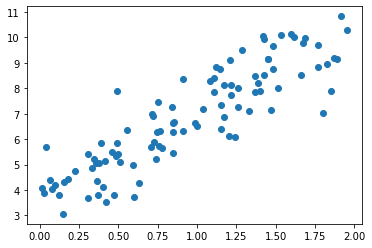

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.scatter(x, y)
plt.show()

In [3]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.77929167],
       [3.24143124]])

In [4]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.77929167],
       [10.26215415]])

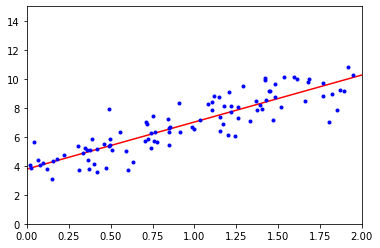

In [9]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.77929167]), array([[3.24143124]]))

In [12]:
lin_reg.predict(x_new)

array([[ 3.77929167],
       [10.26215415]])